In [186]:
# Импортирую основные бибиотеки для работы

In [187]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [188]:
#creating back_up file
data_backup=pd.read_csv('/Users/vladimirant/Downloads/topic_modeling_task_sample_trainPart.csv')

In [189]:
#Набор данных
data=data_backup.copy()

In [190]:
data.head(10)

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты
5,24,69,"5,01005201614243E+017",добрый_день максим это ваш персональный_менедж...,2021-02-25,Бизнес-карта
6,25,73,"5,01005661614212E+017",здравствуйте. это ваш персональный_менеджер_сб...,2021-02-25,Бизнес-карта
7,26,74,"5,01005691614238E+017",добрый_день. сбербанк блок сбер бизнес менедже...,2021-02-25,Зарплатные проекты
8,30,92,"5,01006811613814E+017",добрый_день меня зовут сбербанк_обслуживание ю...,2021-02-20,Эквайринг
9,36,111,"5,01008001613546E+017",сбербанк прописано что здравствуйте. вы обраща...,2021-02-17,Бизнес-карта


In [191]:
# ненулевые значения и типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42765 entries, 0 to 42764
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       42765 non-null  int64 
 1   Unnamed: 0.1                     42765 non-null  int64 
 2   ucid                             42765 non-null  object
 3   text_employer                    42765 non-null  object
 4   date                             42765 non-null  object
 5   ACTION_ITEM_RESULT_PRODUCT_NAME  42765 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [192]:
#Нет пропущенных значений

In [193]:
#описываем датасет
data.describe()

,Unnamed: 0,Unnamed: 0.1
count,42765.000000,42765.000000
mean,69597.502514,175791.619081
std,40045.782912,101005.002178
min,3.000000,7.000000
25%,34947.000000,88489.000000
50%,69668.000000,176096.000000
75%,104269.000000,263220.000000
max,138905.000000,350816.000000


In [194]:
#Просто выборочно смотрю сожержание текста

In [10]:
data['text_employer'][0]

'добрый_день. это клиентский_менеджер виктория сбер бизнес звоню вам как индивидуальный_предприниматель вам удобно говорить. я не знаем. я не пойму много вашего времени предложение которую я хотела с вами обсудить я звоню рассказать что вам доступно специальное предложение по бизнес-карте эта карта позволяет круглосуточно вносите снимать наличные с расчетного счета основной ее преимущества эта оплата ежедневных покупок без снятие наличных неуплаты комиссия_банка фактически эта карта она привязана будет к вашему расчётный_счёт с круглосуточным доступа. и возможности подключить бизнес кэшбэк чтобы зарабатывать на своих покупках если вы заберете карту из отделение по апреля по года обслуживание по ней для вас будут бесплатными подать заявку при этом необходимо до первого марта тоже включительно поэтому и звоню уточнить для вас оформить бизнес-карту в подарок от банка на года с бесплатным обслуживанием. конечно там будет карта и стоимость тысячи рублей в год обслуживание и рублей в месяц н

In [24]:
data['text_employer'][1]

'добрый_день. меня зовут клиентский_менеджер_сбербанк прописано звоню вам как индивидуальный_предприниматель вам удобно сейчас говорить. есть услуги которые рекомендуют для вас хотела сказать чтобы вы знали всех ваших возможностях ранее мне передали информацию что для вас был актуален сервис зарплатный_проект сбера текущий момент не подключили хочу уточнить передумали или просто еще не успели это сделать. скажите пожалуйста а что на текущий момент останавливает ведь помощи него вы сможете оплачивать заработный_плата или с сотрудником или себе как вам это потребностей и снижать. самостоятельно. так преимущества заключается в том что вы в мобильном приложении в любое удобное время сможете сформировать перевод и денежный_средство поступят уже в ближайшие минут на вашу карту то есть регламентировано зачисления у нас до минут ну как показывает практика клиенты получается уже в ближайшие минут. конечно по зарплатный_проект эти платежи приоритетное рассматривается в очередь по этому мне приде

In [25]:
data['text_employer'][10]

'добрый_день. это ваш персональный_менеджер_сбербанк бизнес я вам звоню а как индивидуальный_предприниматель вам удобно сейчас говорить. есть услуги которые сбер бизнес для вас рекомендуют хочу сказать чтобы вы были проинформирована возможностях своих и во-первых звоню рассказать что для вас сейчас доступ специальное предложение по по бизнес-карте эта карта которая позволяет круглосуточно вносите снимать наличные с расчетного счета основной ее преимущества от оплаты ежедневных покупок без снятие наличных уплатой комиссия_банка фактически эта карта которая привязана к вашему расчётный_счёт круглосуточно доступа к нему и возможности подключить бизнес кэшбэк чтобы зарабатывать на своих покупках если вы заберете карту из отделений до апреля года обслуживание по ней будут для вас бесплатными подать заявку при этом необходимо до первого марта скажите как вам данное предложение рассказать как можно оформить. по кредитованию скорее всего у вас вопрос. я вас сейчас соединю в конце нашего разгов

In [26]:
data['text_employer'][1120]

'добрый_день слышно меня. это на ваш персональный_менеджер_сбербанк бог сбер название. звоню это у нас многоканальный линия а как вас по звонка именно по корпоративным клиентам. ну все уже счет у вас же открыть в нашем банке. я просто нет я хотела просто рассказать а какие сервис для вас рекомендуем. я поняла вас. понимаю'

In [27]:
data['text_employer'][1087]

'бы здравствуйте здравствуйте большой нибудь ну в смысле. добрый_день. меня зовут клиентский_менеджер сбер сбербанк_бизнес звоню вам как индивидуальный_предприниматель удобно сейчас говорить. когда могу перезвонить. а я хотел бы рассказать вам о зарплатный_проект эта услуга благодаря которое вы можете выплачивать заработный_плата сотрудникам на карта_сбербанк если они у вас есть и также использовать для себя чтобы наличную карту переводить до тысяч рублей дополнительно а без комиссии. конечно. хорошо конечно. а именно не не зарплату а это будет как прочее выплаты все верно вы сможете как раз использовал зарплатный_проект для себя. то есть вы сейчас можете по обслуживанию расчетного счета переводить до тысяч рублей без комиссии из с зарплатный_проект вы сможете еще тысяч приводить без комиссии при необходимости. необходимо зайти в личный_кабинет систему сбербанк_бизнес_онлайн компьютерная версии мобильная версия без разницы я вам перезвоню удобное для вас время и тогда мы с вами свою вм

In [195]:
# Создаю колонку с разделенным текстом на слова
data['splitted_text']=data['text_employer'].str.split()


In [196]:
len(data)

42765

In [197]:
#Заметил в тескте слова с нижним подчеркиванием
# хочу их все найти и посмотреть, возможно будет полезно

list_words_underscore=[]
for i in range(len(data)):
    for j in data['splitted_text'][i]:
        if "_" in j:
            list_words_underscore.append(j)
        else:
            1
            

In [198]:
list_words_underscore_clean=[]
list_words_underscore_clean

[]

In [199]:
# Убираю точку в словах с подчеркиванием

for i in range(len(list_words_underscore)):
    g=str(list_words_underscore[i].replace(".",""))
    list_words_underscore_clean.append(g)
    


In [200]:
list_words_underscore_clean

['добрый_день',
 'клиентский_менеджер',
 'индивидуальный_предприниматель',
 'комиссия_банка',
 'расчётный_счёт',
 'добрый_день',
 'клиентский_менеджер_сбербанк',
 'индивидуальный_предприниматель',
 'зарплатный_проект',
 'заработный_плата',
 'денежный_средство',
 'зарплатный_проект',
 'денежный_средство',
 'добрый_день',
 'индивидуальный_предприниматель',
 'добрый_день',
 'клиентский_менеджер',
 'добрый_день',
 'клиентский_менеджер',
 'зарплатный_проект',
 'физический_лицо',
 'личный_кабинет',
 'денежный_средство',
 'зарплатный_проект',
 'персональный_менеджер',
 'добрый_день',
 'персональный_менеджер_сбербанк',
 'индивидуальный_предприниматель',
 'расчётный_счёт',
 'комиссия_банка',
 'отделение_банка',
 'продукт_банка',
 'персональный_менеджер_сбербанк',
 'индивидуальный_предприниматель',
 'добрый_день',
 'добрый_день',
 'сбербанк_обслуживание',
 'юридический_лицо',
 'процентный_ставка',
 'процентный_ставка',
 'расчётный_счёт',
 'расчётный_счёт',
 'денежный_средство',
 'денежный_средст

In [201]:
#cписок уникальных значений слов с подчеркиванием

unique_underscore_words=set(list_words_underscore_clean)

In [203]:
# считаем частоту употребления слов с подчеркиванием

import collections      
count_frequency = collections.Counter(list_words_underscore_clean) 
print(count_frequency)

Counter({'добрый_день': 34559, 'индивидуальный_предприниматель': 22521, 'зарплатный_проект': 21016, 'личный_кабинет': 12681, 'расчётный_счёт': 12259, 'персональный_менеджер': 11433, 'номер_телефон': 8160, 'бизнес_карта': 8079, 'персональный_менеджер_сбербанк': 7974, 'денежный_средство': 7487, 'услуга_банка': 7279, 'комиссия_банка': 7041, 'отделение_банка': 6934, 'сбербанк_бизнес': 6200, 'клиентский_менеджер': 5162, 'физический_лицо': 4615, 'пакет_услуга': 4611, 'сбербанк_бизнес_онлайн': 4136, 'торговый_эквайринг': 3693, 'годовой_обслуживание': 3665, 'личный_карта': 3370, 'карта_физический_лицо': 2771, 'заработный_плата': 2551, 'зарплатный_договор': 2533, 'клиентский_менеджер_сбербанк': 2444, 'сбербанк_клиентский_менеджер': 2373, 'электронный_почта': 2287, 'удалённый_персональный_менеджер': 2270, 'бизнес_онлайн': 2264, 'карта_сбербанк': 2246, 'офис_банка': 2225, 'продукт_банка': 2197, 'юридический_лицо': 1971, 'выпуск_карта': 1952, 'обслуживание_юридический_лицо': 1933, 'менеджер_сберба

In [204]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто..."
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже..."
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб..."
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у..."
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн..."


In [205]:
# Target classes
print(data['ACTION_ITEM_RESULT_PRODUCT_NAME'].unique(), len(data['ACTION_ITEM_RESULT_PRODUCT_NAME'].unique()))

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета'] 4


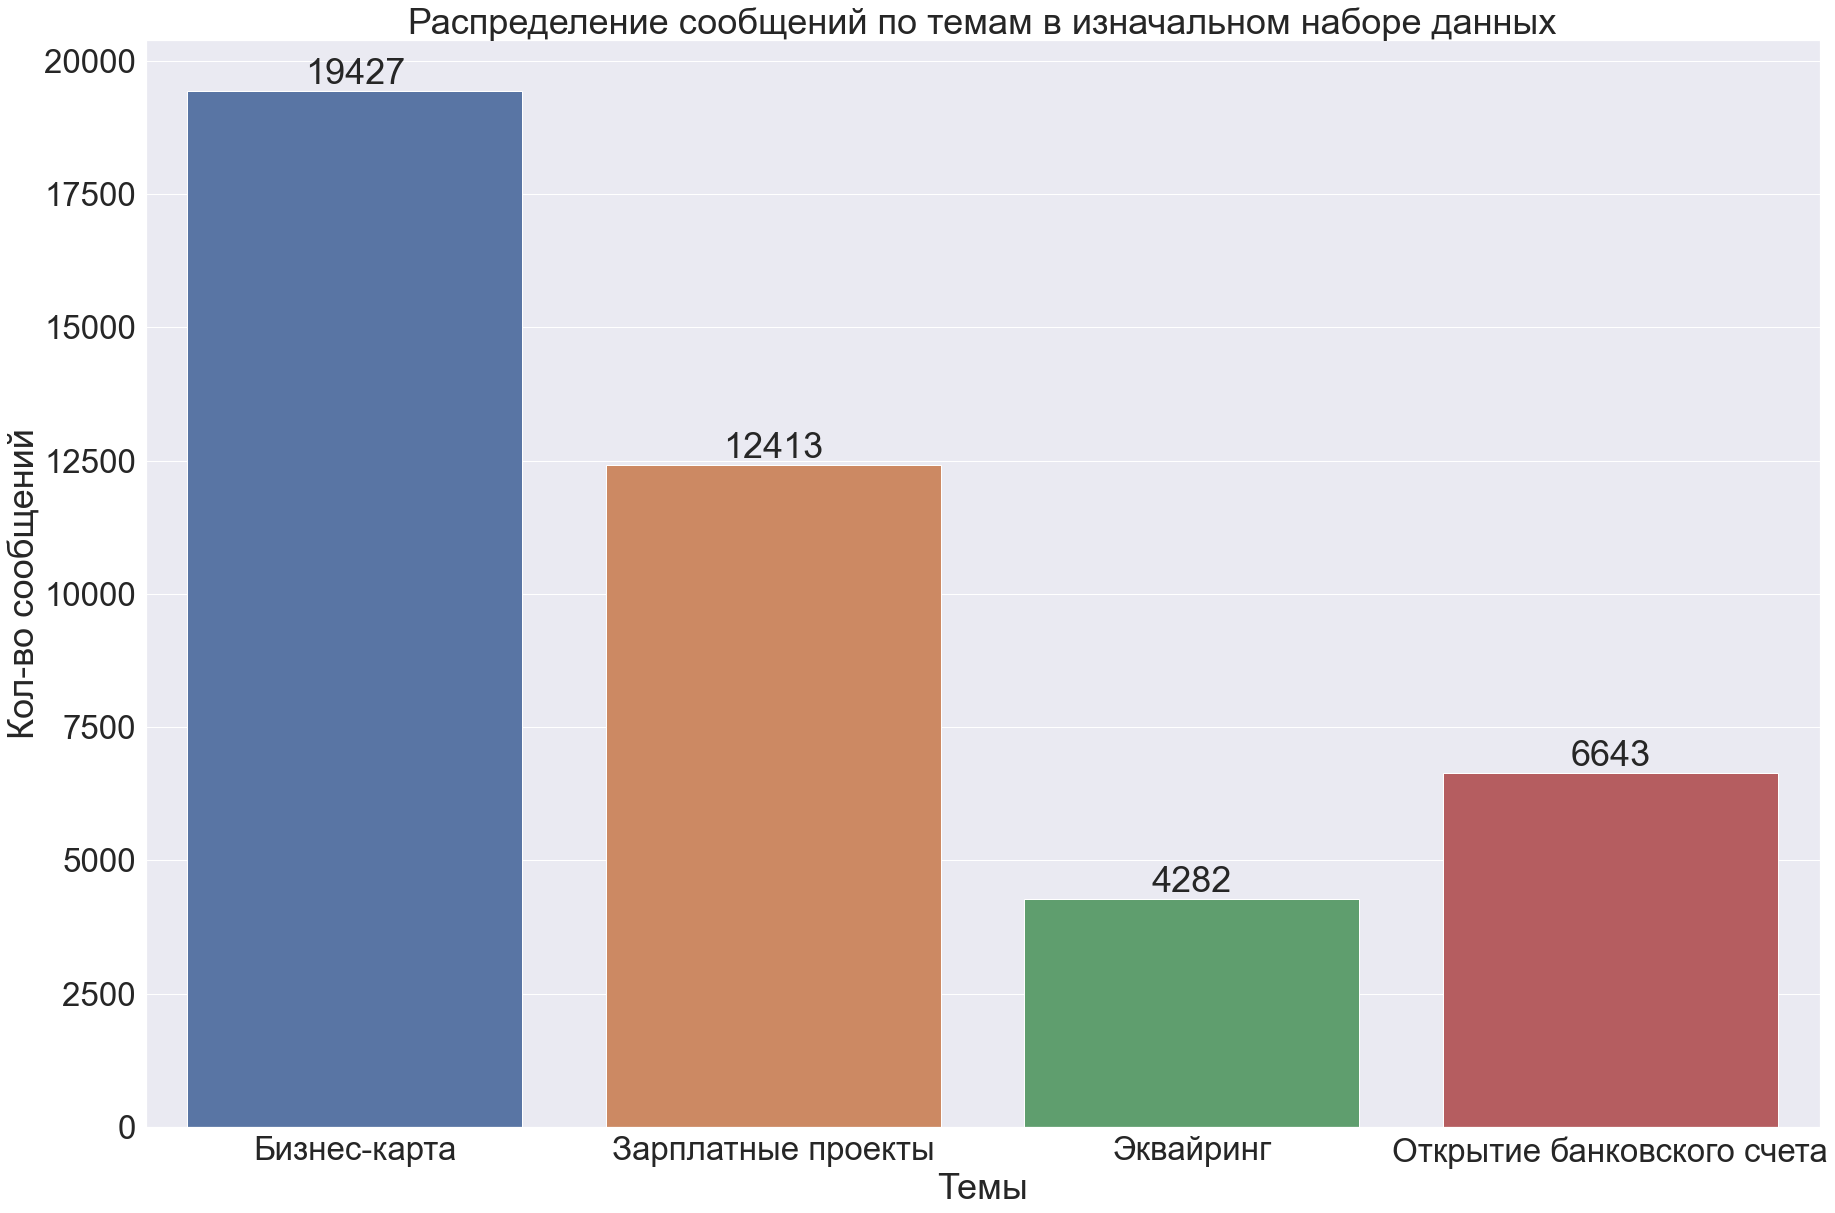

In [206]:
#Distribution of target varable in the whole set

sns.set(font_scale=3)

plt.subplots(figsize=(30,20))
ax=sns.countplot(x='ACTION_ITEM_RESULT_PRODUCT_NAME',data=data)
ax.set_title('Распределение сообщений по темам в изначальном наборе данных')
ax.set_xlabel('Темы')
ax.set_ylabel('Кол-во сообщений')
for label in ax.containers:
    ax.bar_label(label)

In [207]:
# Мы видим, что у нас классы- темы обращений распределены неравномерно
# c этим нужно что-то делать
# Можно применить методы SMOT/OVERSAMPLING/Undersampling и др.
# В рамках confusion matrix мы должны внимательно смотреть 
# на метрики для каждого из классов, а не только AUC
# нужно сохранять пропорцию при разделении данных на train/test set

# Предобработка текста

In [208]:
#Загружаю пакеты необходимые для обрпаботки

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladimirant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vladimirant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<AxesSubplot:>

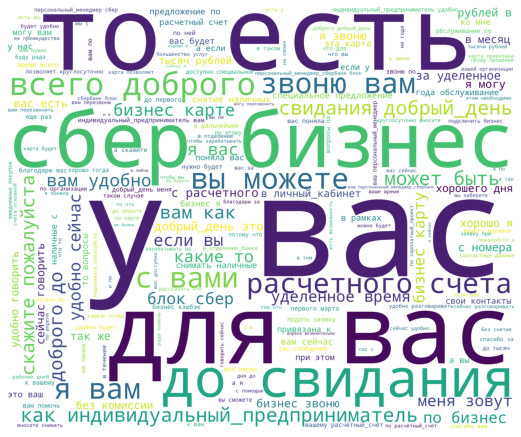

In [210]:
#Строим облако наиболее часто встречающихся слов

def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(data['text_employer'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [211]:
len(corpus)

7884696

In [212]:
# Количество уникальных слов
num_words = len(set(corpus))
num_words
     

45401

In [213]:
# Здесь делаю код, чтобы "_" не удалялся
# Думаю, что слова с "_" это какие-то специальные метки
# и могут быть оч полезны для классификации


In [214]:
import string
import re
punctuation=string.punctuation

In [215]:
# !!!! нужно будет раскомментить
# здесь делаю так, что "_" удаляется из списка знаков пунктуции, котрые надо удалить

punctuation_new=re.sub("_","",punctuation)

In [216]:
russian_stopwords = stopwords.words("russian")

In [217]:
#punctuation_new здесь, словаа с "_" сохранятся

# Создаю фуекцию для удаления знаков пунктуации, чисел и множественных пробелов из текста
import string
def remove_punctuation(text):
    return "".join([ch if ch not in punctuation_new else ' ' for ch in text])

def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])

import re
def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

In [218]:
preproccessing = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation(text))))
data['preprocessed'] = list(map(preproccessing, data['text_employer']))

In [219]:
data.head(40)

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...
5,24,69,"5,01005201614243E+017",добрый_день максим это ваш персональный_менедж...,2021-02-25,Бизнес-карта,"[добрый_день, максим, это, ваш, персональный_м...",добрый_день максим это ваш персональный_менедж...
6,25,73,"5,01005661614212E+017",здравствуйте. это ваш персональный_менеджер_сб...,2021-02-25,Бизнес-карта,"[здравствуйте., это, ваш, персональный_менедже...",здравствуйте это ваш персональный_менеджер_сбе...
7,26,74,"5,01005691614238E+017",добрый_день. сбербанк блок сбер бизнес менедже...,2021-02-25,Зарплатные проекты,"[добрый_день., сбербанк, блок, сбер, бизнес, м...",добрый_день сбербанк блок сбер бизнес менеджер...
8,30,92,"5,01006811613814E+017",добрый_день меня зовут сбербанк_обслуживание ю...,2021-02-20,Эквайринг,"[добрый_день, меня, зовут, сбербанк_обслуживан...",добрый_день меня зовут сбербанк_обслуживание ю...
9,36,111,"5,01008001613546E+017",сбербанк прописано что здравствуйте. вы обраща...,2021-02-17,Бизнес-карта,"[сбербанк, прописано, что, здравствуйте., вы, ...",сбербанк прописано что здравствуйте вы обращае...


In [220]:
#Лемматизация

In [221]:
f='которых которые твой которой которого сих ком свой твоя этими слишком нами всему будь саму чаще ваше сами наш затем еще самих наши ту каждое мочь весь этим наша своих оба который зато те этих вся ваш такая теми ею которая нередко каждая также чему собой самими нем вами ими откуда такие тому та очень сама нему алло оно этому кому тобой таки твоё каждые твои мой нею самим ваши ваша кем мои однако сразу свое ними всё неё тех хотя всем тобою тебе одной другие эта о само эта буду самой моё своей такое всею будут своего кого свои мог нам особенно её самому наше кроме вообще вон мною никто это'

In [222]:
f=f.split()

In [223]:
#Русские стоп-слова, которые надо будет удалить.

russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...', 'т.д.', 'т', 'д'])
russian_stopwords.extend(f)###
russian_stopwords.extend('весь')###

russian_stopwords.extend(['звоню','звонить','звонила','говорю', 'банк','говорить', 'сбер', 
                         'сбербанк'])####

In [224]:
from tqdm import tqdm

In [225]:
# ф-я удалябщая стоп-слова
def remove_stop_words(text):
    tokens = word_tokenize(text) 
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    return " ".join(tokens)

In [226]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...


In [227]:
# функция для привидения всех слов в начальную форму - леммация


from pymorphy2 import MorphAnalyzer

pymorphy = MorphAnalyzer()


def lemmatize_with_pymorphy(tokens):
    lemms = [pymorphy.parse(token)[0].normal_form for token in tokens]
    return lemms

In [228]:
# в этой клетке создаю столбец в котором из стобца text_employer
# будут оставлены только слова с подчеркиванием из сообщения

from nltk import word_tokenize

sw_texts_list = []
for text in tqdm(data['preprocessed']):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ' and "_" in token]
    text = " ".join(tokens)
    sw_texts_list.append(text)

data['text_underscore_tokens'] = sw_texts_list

100%|██████████| 42765/42765 [00:49<00:00, 869.19it/s]


In [229]:
# в этой клетке создаю столбец в котором из стобца text_employer
# будут оставлены только слова БЕЗ подчеркиваниея из сообщения
# леммализирую их

from nltk import word_tokenize

sw_texts_list = []
for text in tqdm(data['preprocessed']):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ' and "_" not in token]
    tokens = lemmatize_with_pymorphy(tokens)
    text = " ".join(tokens)
    sw_texts_list.append(text)

data['text_NO_underscore_tokens'] = sw_texts_list

100%|██████████| 42765/42765 [11:53<00:00, 59.98it/s]  


In [230]:
data.head(25)

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...
5,24,69,"5,01005201614243E+017",добрый_день максим это ваш персональный_менедж...,2021-02-25,Бизнес-карта,"[добрый_день, максим, это, ваш, персональный_м...",добрый_день максим это ваш персональный_менедж...,добрый_день персональный_менеджер_сбербанк инд...,максим бизнес удобно разговаривать рассказать ...
6,25,73,"5,01005661614212E+017",здравствуйте. это ваш персональный_менеджер_сб...,2021-02-25,Бизнес-карта,"[здравствуйте., это, ваш, персональный_менедже...",здравствуйте это ваш персональный_менеджер_сбе...,персональный_менеджер_сбербанк индивидуальный_...,здравствуйте блок бизнес сказать пожалуйста уд...
7,26,74,"5,01005691614238E+017",добрый_день. сбербанк блок сбер бизнес менедже...,2021-02-25,Зарплатные проекты,"[добрый_день., сбербанк, блок, сбер, бизнес, м...",добрый_день сбербанк блок сбер бизнес менеджер...,добрый_день,блок бизнес менеджер удобно разговаривать мочь...
8,30,92,"5,01006811613814E+017",добрый_день меня зовут сбербанк_обслуживание ю...,2021-02-20,Эквайринг,"[добрый_день, меня, зовут, сбербанк_обслуживан...",добрый_день меня зовут сбербанк_обслуживание ю...,добрый_день сбербанк_обслуживание юридический_...,звать представитель ограниченный ответственнос...
9,36,111,"5,01008001613546E+017",сбербанк прописано что здравствуйте. вы обраща...,2021-02-17,Бизнес-карта,"[сбербанк, прописано, что, здравствуйте., вы, ...",сбербанк прописано что здравствуйте вы обращае...,индивидуальный_предприниматель,прописать здравствуйте обращаться иной верно п...


In [231]:
# Изначально функция очистки текста была настроена так,
# что она не удаляет слова содержащие "_"
# здесь настраиваю ее так, чтобы она все слова преобразовала в их нач. формы
# т/е слова содержащие "_" тоже преобразуются в норм слова и 

In [232]:
#эту не использую - как шаблон

#from nltk import word_tokenize

#sw_texts_list = []
#for text in tqdm(data['preprocessed']):
    #tokens = word_tokenize(text)
   #tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
   #tokens = lemmatize_with_pymorphy(tokens)
    #text = " ".join(tokens)
    #sw_texts_list.append(text)

#data['text_sw'] = sw_texts_list

SyntaxError: invalid syntax (<ipython-input-232-9e6a1ae68396>, line 9)

In [233]:
# в этой клетке создаю столбец в котором все слова из сообшения text_employer
# будут лематизированны, слова с подчеркиваниями будут сохранены.

sw_texts_list = []
for text in tqdm(data['preprocessed']):
    tokens = word_tokenize(text)
    tokens = lemmatize_with_pymorphy(tokens)
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    text = " ".join(tokens)
    sw_texts_list.append(text)

data['text_lemma_with_underscore'] = sw_texts_list

100%|██████████| 42765/42765 [29:48<00:00, 23.91it/s]  


In [234]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens,text_lemma_with_underscore
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...,добрый_деть клиентский_менеджер виктория бизне...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...,добрый_деть звать клиентский_менеджер_сбербанк...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...,добрый_деть звать блок бизнес обращаться индив...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...,ещё добрый_деть клиентский_менеджер удобно раз...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...,добрый_деть блок бизнес клиентский_менеджер э ...


In [235]:
#punctuation здесь, словаа с "_" НЕ сохранятся!!!!!!

# Создаю фуекцию для удаления знаков пунктуации, чисел и множественных пробелов из текста

def remove_punctuation_2(text):
    return "".join([ch if ch not in punctuation else ' ' for ch in text])

def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])

import re
def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

In [236]:
preproccessing_2 = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation_2(text))))
data['preprocessed_2'] = list(map(preproccessing_2, data['text_employer']))

In [237]:
# в этой клетке создаю столбец в котором все слова из сообшения text_employer
# будут лематизированны, нижние подчеркивания будут удалены
# все слова будут приведены в нормальную форму

sw_texts_list = []
for text in tqdm(data['preprocessed_2']):
    tokens = word_tokenize(text)
    tokens = lemmatize_with_pymorphy(tokens)
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    text = " ".join(tokens)
    sw_texts_list.append(text)

data['text_lemma_FULL'] = sw_texts_list

100%|██████████| 42765/42765 [35:40<00:00, 19.98it/s]    


In [238]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens,text_lemma_with_underscore,preprocessed_2,text_lemma_FULL
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...,добрый_деть клиентский_менеджер виктория бизне...,добрый день это клиентский менеджер виктория с...,добрый день клиентский менеджер виктория бизне...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...,добрый_деть звать клиентский_менеджер_сбербанк...,добрый день меня зовут клиентский менеджер сбе...,добрый день звать клиентский менеджер прописат...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...,добрый_деть звать блок бизнес обращаться индив...,добрый день меня зовут сбербанк блок сбер бизн...,добрый день звать блок бизнес обращаться индив...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...,ещё добрый_деть клиентский_менеджер удобно раз...,еще раз добрый день клиентский менеджер удобно...,ещё добрый день клиентский менеджер удобно раз...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...,добрый_деть блок бизнес клиентский_менеджер э ...,добрый день это сбербанк блок сбер бизнес клие...,добрый день блок бизнес клиентский менеджер э ...


In [239]:
#Новое облако слов

In [240]:
corpus_clean = get_corpus(data['text_lemma_with_underscore'].values)
procWordCloud = get_wordCloud(corpus_clean)

In [241]:
num_words = len(set(corpus_clean))
num_words

13360

In [242]:
# кол-во уникальных слов Значительно уменьщилось

<AxesSubplot:>

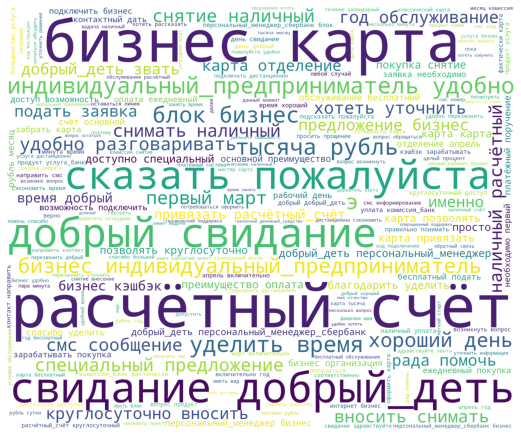

In [243]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [244]:
count_frequency_2

Counter({'добрый_деть': 34559,
         'это': 83711,
         'клиентский_менеджер': 5162,
         'виктория': 1924,
         'сбер': 36604,
         'бизнес': 78509,
         'звонить': 51359,
         'индивидуальный_предприниматель': 22521,
         'удобно': 47299,
         'говорить': 25606,
         'знать': 4869,
         'понять': 28981,
         'ваш': 73903,
         'время': 45859,
         'предложение': 22642,
         'который': 26561,
         'хотеть': 29651,
         'обсудить': 3807,
         'рассказать': 10912,
         'доступно': 7942,
         'специальный': 8810,
         'карта': 119440,
         'позволять': 6942,
         'круглосуточно': 9261,
         'вносить': 9153,
         'снимать': 10773,
         'наличный': 24786,
         'расчётный': 28837,
         'счёт': 47148,
         'основной': 6044,
         'преимущество': 8736,
         'оплата': 12860,
         'ежедневный': 5424,
         'покупка': 13832,
         'снятие': 12205,
         'неуплата

In [247]:
count_frequency_2 = collections.Counter(corpus_clean) 
print(count_frequency_2)

Counter({'карта': 119440, 'бизнес': 78509, 'вопрос': 50462, 'удобно': 47299, 'счёт': 47148, 'время': 45859, 'сказать': 37616, 'добрый_деть': 34559, 'услуга': 33772, 'пожалуйста': 32935, 'хотеть': 29651, 'понять': 28981, 'расчётный': 28837, 'свидание': 27988, 'перезвонить': 27424, 'добрый': 27376, 'уточнить': 26581, 'комиссия': 25786, 'наличный': 24786, 'смс': 24230, 'тысяча': 24108, 'э': 24108, 'информация': 23701, 'рубль': 23678, 'год': 23361, 'день': 23158, 'предложение': 22642, 'индивидуальный_предприниматель': 22521, 'помочь': 22071, 'подключить': 21677, 'организация': 21379, 'обслуживание': 21241, 'зарплатный_проект': 21016, 'ещё': 20454, 'дистанционно': 20358, 'дать': 20170, 'номер': 20133, 'направить': 20012, 'бесплатный': 19871, 'либо': 18825, 'код': 18500, 'месяц': 17896, 'оформить': 17848, 'смочь': 17619, 'контакт': 17435, 'обращаться': 16914, 'возможность': 16803, 'спасибо': 16707, 'нужно': 16687, 'заявка': 16351, 'хороший': 15852, 'продукт': 15595, 'именно': 15215, 'необход

In [246]:
# в теории еще можно удалить слова сбер, сбербанк, свой, ваш, звонить,э, это 

# TRAIN-TEST SPLIT + ML MODELS PART

In [493]:
#importing libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score




# Train-test split

In [250]:
X = data['text_lemma_with_underscore']
y = data['ACTION_ITEM_RESULT_PRODUCT_NAME']

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 42)

In [251]:
my_tags = data['ACTION_ITEM_RESULT_PRODUCT_NAME'].unique()

# Logistic Regression

In [495]:
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])

In [496]:
%%time
logreg.fit(X_train, y_train)
y_train_pr=logreg.predict(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 31 s, sys: 5.13 s, total: 36.2 s
Wall time: 9.76 s


In [497]:
%%time
y_pred_test = logreg.predict(X_test)

CPU times: user 615 ms, sys: 26.4 ms, total: 642 ms
Wall time: 656 ms


In [498]:
#train set confusion matrix
print(my_tags)
confusion_matrix(y_train_pr, y_train)


['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[14683,  1783,  1265,   577],
       [  570,  7763,   466,   238],
       [  237,   305,  3501,   141],
       [   52,    79,    82,  2470]])

In [501]:
#Train_set
print('accuracy %s' % accuracy_score(y_train_pr, y_train))
print(classification_report(y_train_pr, y_train))

accuracy 0.8306149888927862
                            precision    recall  f1-score   support

              Бизнес-карта       0.94      0.80      0.87     18308
        Зарплатные проекты       0.78      0.86      0.82      9037
Открытие банковского счета       0.66      0.84      0.74      4184
                 Эквайринг       0.72      0.92      0.81      2683

                  accuracy                           0.83     34212
                 macro avg       0.78      0.85      0.81     34212
              weighted avg       0.85      0.83      0.83     34212



In [259]:
#test set confusion matrix
print(my_tags)
confusion_matrix(y_pred_test, y_test)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[3556,  574,  334,  157],
       [ 214, 1782,  160,   70],
       [ 105,  105,  795,   47],
       [  10,   22,   40,  582]])

In [260]:
#Test_set

print('accuracy %s' % accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test,target_names=my_tags))

accuracy 0.785104641646206
                            precision    recall  f1-score   support

              Бизнес-карта       0.92      0.77      0.84      4621
        Зарплатные проекты       0.72      0.80      0.76      2226
                 Эквайринг       0.60      0.76      0.67      1052
Открытие банковского счета       0.68      0.89      0.77       654

                  accuracy                           0.79      8553
                 macro avg       0.73      0.80      0.76      8553
              weighted avg       0.81      0.79      0.79      8553



# Naive B

In [262]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [263]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [264]:
%%time
nb.fit(X_train, y_train)

CPU times: user 2.54 s, sys: 63.8 ms, total: 2.6 s
Wall time: 2.61 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [265]:
y_train_pr=nb.predict(X_train)

In [266]:
#train set confusion matrix
print(my_tags)
confusion_matrix(y_train_pr, y_train)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[14499,  2180,  1551,   830],
       [  856,  7548,  1138,   777],
       [  155,   158,  2558,    99],
       [   32,    44,    67,  1720]])

In [267]:
y_pred_test = nb.predict(X_test)

In [268]:
#test set confusion matrix
print(my_tags)
confusion_matrix(y_pred_test, y_test)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[3576,  639,  391,  214],
       [ 258, 1787,  337,  206],
       [  39,   42,  576,   22],
       [  12,   15,   25,  414]])

In [269]:
print('accuracy %s' % accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test,target_names=my_tags))

accuracy 0.7427803110019876
                            precision    recall  f1-score   support

              Бизнес-карта       0.74      0.92      0.82      3885
        Зарплатные проекты       0.69      0.72      0.70      2483
                 Эквайринг       0.85      0.43      0.57      1329
Открытие банковского счета       0.89      0.48      0.63       856

                  accuracy                           0.74      8553
                 macro avg       0.79      0.64      0.68      8553
              weighted avg       0.76      0.74      0.73      8553



# SVM classifier

In [271]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))
])


In [272]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [273]:
y_train_pr=sgd_ppl_clf.predict(X_train)

In [274]:
#train set confusion matrix
print(my_tags)
confusion_matrix(y_train_pr, y_train)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[14752,  2060,  1335,   568],
       [  453,  7400,   397,   182],
       [  261,   344,  3456,   141],
       [   76,   126,   126,  2535]])

In [275]:
#Train_set
print('accuracy %s' % accuracy_score(y_train_pr, y_train))
print(classification_report(y_train_pr, y_train))

accuracy 0.8226061031217117
                            precision    recall  f1-score   support

              Бизнес-карта       0.95      0.79      0.86     18715
        Зарплатные проекты       0.75      0.88      0.81      8432
Открытие банковского счета       0.65      0.82      0.73      4202
                 Эквайринг       0.74      0.89      0.81      2863

                  accuracy                           0.82     34212
                 macro avg       0.77      0.84      0.80     34212
              weighted avg       0.84      0.82      0.83     34212



In [276]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print('accuracy %s' % accuracy_score(predicted_sgd, y_test))
print(metrics.classification_report(predicted_sgd, y_test))

accuracy 0.7847538875248451
                            precision    recall  f1-score   support

              Бизнес-карта       0.93      0.76      0.84      4730
        Зарплатные проекты       0.69      0.84      0.76      2053
Открытие банковского счета       0.59      0.75      0.66      1051
                 Эквайринг       0.71      0.84      0.77       719

                  accuracy                           0.78      8553
                 macro avg       0.73      0.80      0.76      8553
              weighted avg       0.81      0.78      0.79      8553



In [277]:
#test set confusion matrix
print(my_tags)
confusion_matrix(predicted_sgd, y_test)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[3599,  615,  359,  157],
       [ 150, 1723,  129,   51],
       [ 114,  109,  785,   43],
       [  22,   36,   56,  605]])

In [ ]:
# Пытался сделать тюнинг но очень долго

parameters = { 
              'sgd_clf__loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'sgd_clf__class_weight':[None, 'balanced'],
              'sgd_clf__penalty':[None, 'l2', 'l1', 'elasticnet'],
              'tfidf__strip_accents':['ascii', 'unicode', None],
               'tfidf__ngram_range':[(1,2), (1,3), (1,4)]
              }
model = GridSearchCV(sgd_ppl_clf, parameters, cv=4, n_jobs=-1).fit(X_train, y_train)

# Adaboost classifier

In [279]:
ABC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])

In [280]:
%%time
ABC.fit(X_train, y_train)

CPU times: user 18 s, sys: 726 ms, total: 18.7 s
Wall time: 18.7 s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', AdaBoostClassifier())])

In [281]:
y_pred_train=ABC.predict(X_train)

In [282]:
y_pred_ABC = ABC.predict(X_test)

In [283]:
print('accuracy %s' % accuracy_score(y_pred_ABC, y_test))
print(classification_report(y_test, y_pred_ABC,target_names=my_tags))

accuracy 0.769437624225418
                            precision    recall  f1-score   support

              Бизнес-карта       0.72      0.96      0.82      3885
        Зарплатные проекты       0.91      0.63      0.74      2483
                 Эквайринг       0.75      0.55      0.63      1329
Открытие банковского счета       0.85      0.67      0.75       856

                  accuracy                           0.77      8553
                 macro avg       0.81      0.70      0.74      8553
              weighted avg       0.79      0.77      0.76      8553



# RF classifier

In [292]:
RF = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

In [293]:
%%time
RF.fit(X_train, y_train)

CPU times: user 1min 36s, sys: 1.8 s, total: 1min 38s
Wall time: 1min 40s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [286]:
y_pred_tr = RF.predict(X_train)

In [294]:
#train set confusion matrix
print(my_tags)
confusion_matrix(y_pred_tr, y_train)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[15505,   151,   102,    34],
       [   27,  9769,    15,     8],
       [    9,     8,  5197,     5],
       [    1,     2,     0,  3379]])

In [295]:
#train set
print('accuracy %s' % accuracy_score(y_pred_tr, y_train))
print(classification_report(y_pred_tr,y_train, target_names=my_tags))

accuracy 0.9894189173389454
                            precision    recall  f1-score   support

              Бизнес-карта       1.00      0.98      0.99     15792
        Зарплатные проекты       0.98      0.99      0.99      9819
                 Эквайринг       0.98      1.00      0.99      5219
Открытие банковского счета       0.99      1.00      0.99      3382

                  accuracy                           0.99     34212
                 macro avg       0.99      0.99      0.99     34212
              weighted avg       0.99      0.99      0.99     34212



In [289]:
y_pred_test = RF.predict(X_test)

In [296]:
print('accuracy %s' % accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test,target_names=my_tags))

accuracy 0.7858061498889278
                            precision    recall  f1-score   support

              Бизнес-карта       0.76      0.92      0.83      3885
        Зарплатные проекты       0.80      0.73      0.76      2483
                 Эквайринг       0.82      0.56      0.66      1329
Открытие банковского счета       0.88      0.69      0.77       856

                  accuracy                           0.79      8553
                 macro avg       0.81      0.72      0.76      8553
              weighted avg       0.79      0.79      0.78      8553



In [312]:
# Очевидно, что RF overfits

#Тюнинг большого кол-ва параметров занимает слошком много времени

# Впринципе попробовал провести здесь небольшой тюнинг модели,
# и результаты для тестового набора данных улучшились. 

# Думаю широкий хороший каественний тюнинг поможет улушить качество модели

In [329]:
#Тюнинг параметров занимает слошком много времени


param_grid = {
    "clf__n_estimators": [64, 128, 256,512,1024,2048],
    "clf__max_depth": [2,8,16,32,64,128],
}

# Perform grid search, fit it, and print score
gs = GridSearchCV(RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
gs.fit(X_train, y_train)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [2, 8, 16, 32, 64, 128],
                         'clf__n_estimators': [64, 128, 256, 512, 1024, 2048]},
             verbose=1000)

In [330]:
print('accuracy train set %s' % accuracy_score(gs.predict(X_train), y_train))

accuracy train set 0.9838945399275109


In [332]:
print('train set')
print(classification_report(y_train, gs.predict(X_train),target_names=my_tags))

train set
                            precision    recall  f1-score   support

              Бизнес-карта       0.97      1.00      0.98     15542
        Зарплатные проекты       1.00      0.97      0.99      9930
                 Эквайринг       1.00      0.96      0.98      5314
Открытие банковского счета       1.00      0.97      0.99      3426

                  accuracy                           0.98     34212
                 macro avg       0.99      0.98      0.98     34212
              weighted avg       0.98      0.98      0.98     34212



In [331]:
print('accuracy test set %s' % accuracy_score(gs.predict(X_test), y_test))

accuracy test set 0.7898982813048053


In [333]:
print('test set')
print(classification_report(y_test, gs.predict(X_test),target_names=my_tags))

test set
                            precision    recall  f1-score   support

              Бизнес-карта       0.75      0.95      0.83      3885
        Зарплатные проекты       0.84      0.70      0.76      2483
                 Эквайринг       0.84      0.56      0.67      1329
Открытие банковского счета       0.89      0.70      0.78       856

                  accuracy                           0.79      8553
                 macro avg       0.83      0.73      0.76      8553
              weighted avg       0.80      0.79      0.78      8553



In [357]:
#RF overfits, нужен качественный тюнинг

# GB

In [147]:
GB_clf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', GradientBoostingClassifier()),
              ])

In [151]:
%%time
GB_clf.fit(X_train, y_train)

CPU times: user 5min 17s, sys: 6.71 s, total: 5min 24s
Wall time: 5min 26s


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())])

In [152]:
y_pred_tr=GB_clf.predict(X_train)

In [153]:
print('accuracy %s' % accuracy_score(y_pred_tr, y_train))
print(classification_report(y_train, y_pred_train,target_names=my_tags))

accuracy 0.8052145446042325
                            precision    recall  f1-score   support

              Бизнес-карта       0.72      0.96      0.82     15542
        Зарплатные проекты       0.90      0.65      0.75      9930
                 Эквайринг       0.78      0.54      0.64      5314
Открытие банковского счета       0.88      0.69      0.78      3426

                  accuracy                           0.78     34212
                 macro avg       0.82      0.71      0.75     34212
              weighted avg       0.80      0.78      0.77     34212



In [154]:
y_pred_GB_clf = GB_clf.predict(X_test)

In [158]:
#test
print('accuracy %s' % accuracy_score(y_pred_GB_clf, y_test))
print(classification_report(y_test, y_pred_GB_clf,target_names=my_tags))

accuracy 0.7832339529989477
                            precision    recall  f1-score   support

              Бизнес-карта       0.74      0.95      0.83      3885
        Зарплатные проекты       0.87      0.68      0.76      2483
                 Эквайринг       0.79      0.56      0.66      1329
Открытие банковского счета       0.87      0.69      0.77       856

                  accuracy                           0.78      8553
                 macro avg       0.82      0.72      0.75      8553
              weighted avg       0.80      0.78      0.78      8553



# Вывод

In [504]:
# RF classifier c тюнингом показал чуть лучшую accuracy на тестовом наборе
# Хотя та же логистическая решрессия покаала оч схожий уровень ACCURACY
# Хотя лог регрессия являнтся относительно простым алгоритмом
# Вообще стоит отметить, что модели все в целом очень близки по всем показателям.


# Хороший тюнинг моделей возможно позволил бы улучшить качество предсказания 
# для многих моделей таких как RF, AB, NB, GB, SGDVlassifier.

# Выбранный RF совсем немного уступает лог регрессии в Accuracy,
# но по таким показателям как weighted avg precison, f1 
# RF проигрывает лог регресии 0.1 в кажжом случае


# По большому счету так как у нас относительно сильно несбалансированный датасет
# нам важна метрика F1 для оценки качества модели

#F1 - cреднее гармоническое между precision и recall

#RF очень близок по всем показателям к лог регрессии

#В тоже время не могу сказать насколько нам в данном случае
# критичны ошибки в предсказании конкретных клаасов

# Вообщем я продолжая с RF





# Confusion matrix и метрики для финальной модели

In [350]:
#accuracy train set

In [348]:
print('accuracy train set %s' % accuracy_score(gs.predict(X_train), y_train))

accuracy train set 0.9838945399275109


In [353]:
#confusion matrix train_set

In [355]:
#train set confusion matrix
print(my_tags)
confusion_matrix(gs.predict(X_train), y_train)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[15536,   254,   189,    86],
       [    5,  9676,     7,     6],
       [    1,     0,  5117,     2],
       [    0,     0,     1,  3332]])

In [352]:
#Classification report rain_set

In [349]:
print('train set')
print(classification_report(y_train, gs.predict(X_train),target_names=my_tags))

train set
                            precision    recall  f1-score   support

              Бизнес-карта       0.97      1.00      0.98     15542
        Зарплатные проекты       1.00      0.97      0.99      9930
                 Эквайринг       1.00      0.96      0.98      5314
Открытие банковского счета       1.00      0.97      0.99      3426

                  accuracy                           0.98     34212
                 macro avg       0.99      0.98      0.98     34212
              weighted avg       0.98      0.98      0.98     34212



In [356]:
#accuracy test set

In [362]:
print('accuracy test set %s' % accuracy_score(gs.predict(X_test), y_test))

accuracy test set 0.7898982813048053


In [360]:
#test set confusion matrix
print(my_tags)
confusion_matrix(gs.predict(X_test), y_test)

['Бизнес-карта' 'Зарплатные проекты' 'Эквайринг'
 'Открытие банковского счета']


array([[3676,  659,  412,  178],
       [ 134, 1743,  136,   61],
       [  63,   59,  740,   20],
       [  12,   22,   41,  597]])

In [361]:
print('test set')
print(classification_report(y_test, gs.predict(X_test),target_names=my_tags))

test set
                            precision    recall  f1-score   support

              Бизнес-карта       0.75      0.95      0.83      3885
        Зарплатные проекты       0.84      0.70      0.76      2483
                 Эквайринг       0.84      0.56      0.67      1329
Открытие банковского счета       0.89      0.70      0.78       856

                  accuracy                           0.79      8553
                 macro avg       0.83      0.73      0.76      8553
              weighted avg       0.80      0.79      0.78      8553



# Финальные предсказания и вывод таблицы

In [334]:
predictions_final=gs.predict(data['text_lemma_with_underscore'])

In [335]:
data_final=data.copy()

In [336]:
data_final['predictions_labels']=predictions_final

In [337]:
data_final.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens,text_lemma_with_underscore,preprocessed_2,text_lemma_FULL,predictions_labels
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...,добрый_деть клиентский_менеджер виктория бизне...,добрый день это клиентский менеджер виктория с...,добрый день клиентский менеджер виктория бизне...,Бизнес-карта
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...,добрый_деть звать клиентский_менеджер_сбербанк...,добрый день меня зовут клиентский менеджер сбе...,добрый день звать клиентский менеджер прописат...,Зарплатные проекты
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...,добрый_деть звать блок бизнес обращаться индив...,добрый день меня зовут сбербанк блок сбер бизн...,добрый день звать блок бизнес обращаться индив...,Бизнес-карта
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...,ещё добрый_деть клиентский_менеджер удобно раз...,еще раз добрый день клиентский менеджер удобно...,ещё добрый день клиентский менеджер удобно раз...,Бизнес-карта
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...,добрый_деть блок бизнес клиентский_менеджер э ...,добрый день это сбербанк блок сбер бизнес клие...,добрый день блок бизнес клиентский менеджер э ...,Зарплатные проекты


In [338]:
# Create new column using dictionary
new_data = { 'Бизнес-карта':1,
'Зарплатные проекты':2,
'Открытие банковского счета':3,
'Эквайринг':4}

In [339]:
data_final['код']=data_final['predictions_labels'].map(new_data)

In [340]:
data_final.head()

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens,text_lemma_with_underscore,preprocessed_2,text_lemma_FULL,predictions_labels,код
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...,добрый_деть клиентский_менеджер виктория бизне...,добрый день это клиентский менеджер виктория с...,добрый день клиентский менеджер виктория бизне...,Бизнес-карта,1
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...,добрый_деть звать клиентский_менеджер_сбербанк...,добрый день меня зовут клиентский менеджер сбе...,добрый день звать клиентский менеджер прописат...,Зарплатные проекты,2
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...,добрый_деть звать блок бизнес обращаться индив...,добрый день меня зовут сбербанк блок сбер бизн...,добрый день звать блок бизнес обращаться индив...,Бизнес-карта,1
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...,ещё добрый_деть клиентский_менеджер удобно раз...,еще раз добрый день клиентский менеджер удобно...,ещё добрый день клиентский менеджер удобно раз...,Бизнес-карта,1
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...,добрый_деть блок бизнес клиентский_менеджер э ...,добрый день это сбербанк блок сбер бизнес клие...,добрый день блок бизнес клиентский менеджер э ...,Зарплатные проекты,2


In [505]:
data_final.to_excel("data_preprocessed.xlsx", sheet_name='Sheet_name_1') 

In [341]:
data_final_answer=data_final[['ucid','text_employer','код']]

# Финальная таблица-ответ

In [342]:
data_final_answer

,ucid,text_employer,код
0,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,1
1,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2
2,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,1
3,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,1
4,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2
...,...,...,...
42760,"5,01034111613466E+017",добрый_день. это ваш персональный_менеджер_сбе...,2
42761,"5,01034111613466E+017",здравствуйте. как я могу к вам обращаться. на ...,2
42762,"5,01035251614262E+017",добрый_день. персональный_менеджер_сбербанк ва...,3
42763,"5,01035571614254E+017",добрый_день. вас персональный_менеджер сбер би...,1


In [343]:
data_final_answer.to_excel("final_table_SCB.xlsx", sheet_name='Sheet_name_1') 

In [344]:
#Metrics for the whole data_set
print('accuracy %s' % accuracy_score(data_final['ACTION_ITEM_RESULT_PRODUCT_NAME'], data_final['predictions_labels']))
print(classification_report(data['ACTION_ITEM_RESULT_PRODUCT_NAME'], data_final['predictions_labels'],target_names=my_tags))

accuracy 0.9450952882029697
                            precision    recall  f1-score   support

              Бизнес-карта       0.92      0.99      0.95     19427
        Зарплатные проекты       0.97      0.92      0.94     12413
                 Эквайринг       0.98      0.88      0.93      6643
Открытие банковского счета       0.98      0.92      0.95      4282

                  accuracy                           0.95     42765
                 macro avg       0.96      0.93      0.94     42765
              weighted avg       0.95      0.95      0.94     42765



# Сохраняю модель

In [345]:
from joblib import Parallel, delayed
import joblib

In [346]:
# Save the model as a pickle in a file
joblib.dump(gs, 'RF_clf_tuned.pkl')
  
# Load the model from the file
RF_runed_from_joblib = joblib.load('RF_clf_tuned.pkl')

# Предложения/комментарии по итогам работы

In [364]:
# Набор данных несбалансированный.
# Могут помочь тезники SMOT, oversampling, undersapmling

In [365]:
# Тюнинг гиперпараметров моделей может помочь улучшить качество, 
# но в моем случае тюнинг занимал очень много времени

In [367]:
# Можно попробовать почистить слова, и удалить еще какие-либо слова или 
# речевые конструкции которые усложняют классификацию
# Я например удалял слова типо "звоню" "звонил" "говорю" и др.
# тк здесь мы работаем с речью оператора когда он звонит
# те данные слова здесь являются шумом
# Также я удалил слова сбер/сбербанк/банк так как ну звонят из сбербанка и тд
# те данные слова здесь являются мусором опять же

# Если потратить больше времени на очистку данных, 
# удалить еще "мусорные слова" думаю можно улучшить качество классификации

In [368]:
# Пробовал классифицировать на основе только 
# а) слов с подчеркиванием
# б) слова с подчеркиваниями сохранял + все другие слова
# в) слова с подчеркиванием декомпозировал в обычные слова
# во всех случаях проводи лемматизацию.

# во всех случаях примерно одинаковое качество прогноза


# Trying oversapmling

In [401]:
data.head(10)

,Unnamed: 0,Unnamed: 0.1,ucid,text_employer,date,ACTION_ITEM_RESULT_PRODUCT_NAME,splitted_text,preprocessed,text_underscore_tokens,text_NO_underscore_tokens,text_lemma_with_underscore,preprocessed_2,text_lemma_FULL
0,3,7,"5,01000641613474E+017",добрый_день. это клиентский_менеджер виктория ...,2021-02-16,Бизнес-карта,"[добрый_день., это, клиентский_менеджер, викто...",добрый_день это клиентский_менеджер виктория с...,добрый_день клиентский_менеджер индивидуальный...,виктория бизнес удобно знать понять ваш время ...,добрый_деть клиентский_менеджер виктория бизне...,добрый день это клиентский менеджер виктория с...,добрый день клиентский менеджер виктория бизне...
1,6,15,"5,01001121614156E+017",добрый_день. меня зовут клиентский_менеджер_сб...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, клиентский_менедже...",добрый_день меня зовут клиентский_менеджер_сбе...,добрый_день клиентский_менеджер_сбербанк индив...,звать прописать удобно услуга рекомендовать хо...,добрый_деть звать клиентский_менеджер_сбербанк...,добрый день меня зовут клиентский менеджер сбе...,добрый день звать клиентский менеджер прописат...
2,10,28,"5,01001811614178E+017",добрый_день. меня зовут сбербанк блок сбер биз...,2021-02-24,Зарплатные проекты,"[добрый_день., меня, зовут, сбербанк, блок, сб...",добрый_день меня зовут сбербанк блок сбер бизн...,добрый_день индивидуальный_предприниматель,звать блок бизнес обращаться удобно удобный пр...,добрый_деть звать блок бизнес обращаться индив...,добрый день меня зовут сбербанк блок сбер бизн...,добрый день звать блок бизнес обращаться индив...
3,14,35,"5,01002531614256E+017",еще раз добрый_день клиентский_менеджер удобно...,2021-02-25,Бизнес-карта,"[еще, раз, добрый_день, клиентский_менеджер, у...",еще раз добрый_день клиентский_менеджер удобно...,добрый_день клиентский_менеджер,удобно разговаривать мочь уточнить доступ инте...,ещё добрый_деть клиентский_менеджер удобно раз...,еще раз добрый день клиентский менеджер удобно...,ещё добрый день клиентский менеджер удобно раз...
4,23,68,"5,01005041613457E+017",добрый_день. это сбербанк блок сбер бизнес кли...,2021-02-16,Зарплатные проекты,"[добрый_день., это, сбербанк, блок, сбер, бизн...",добрый_день это сбербанк блок сбер бизнес клие...,добрый_день клиентский_менеджер зарплатный_про...,блок бизнес э пышма удобно повод ранее разгова...,добрый_деть блок бизнес клиентский_менеджер э ...,добрый день это сбербанк блок сбер бизнес клие...,добрый день блок бизнес клиентский менеджер э ...
5,24,69,"5,01005201614243E+017",добрый_день максим это ваш персональный_менедж...,2021-02-25,Бизнес-карта,"[добрый_день, максим, это, ваш, персональный_м...",добрый_день максим это ваш персональный_менедж...,добрый_день персональный_менеджер_сбербанк инд...,максим бизнес удобно разговаривать рассказать ...,добрый_деть максим персональный_менеджер_сберб...,добрый день максим это ваш персональный менедж...,добрый день максим персональный менеджер бизне...
6,25,73,"5,01005661614212E+017",здравствуйте. это ваш персональный_менеджер_сб...,2021-02-25,Бизнес-карта,"[здравствуйте., это, ваш, персональный_менедже...",здравствуйте это ваш персональный_менеджер_сбе...,персональный_менеджер_сбербанк индивидуальный_...,здравствуйте блок бизнес сказать пожалуйста уд...,здравствуйте персональный_менеджер_сбербанк бл...,здравствуйте это ваш персональный менеджер сбе...,здравствуйте персональный менеджер блок бизнес...
7,26,74,"5,01005691614238E+017",добрый_день. сбербанк блок сбер бизнес менедже...,2021-02-25,Зарплатные проекты,"[добрый_день., сбербанк, блок, сбер, бизнес, м...",добрый_день сбербанк блок сбер бизнес менеджер...,добрый_день,блок бизнес менеджер удобно разговаривать мочь...,добрый_деть блок бизнес менеджер удобно разгов...,добрый день сбербанк блок сбер бизнес менеджер...,добрый день блок бизнес менеджер удобно разгов...
8,30,92,"5,01006811613814E+017",добрый_день меня зовут сбербанк_обслуживание ю...,2021-02-20,Эквайринг,"[добрый_день, меня, зовут, сбербанк_обслуживан...",добрый_д

In [406]:
train_set=pd.DataFrame()

In [407]:
train_set['X_train']=X_train

In [408]:
train_set['y_train']=y_train

In [409]:
train_set

,X_train,y_train
20790,персональный_менеджер бизнес индивидуальный_пр...,Бизнес-карта
916,продажа нужно сегодня минимум сделать здравств...,Бизнес-карта
31579,добрый_деть звать звать специалист блок бизнес...,Бизнес-карта
2796,добрый_деть менеджер индивидуальный_предприним...,Бизнес-карта
8458,добрый_деть бизнес клиентский_менеджер организ...,Бизнес-карта
...,...,...
36700,добрый_деть просить прощение звать лев блок би...,Бизнес-карта
9988,добрый_деть бизнес клиентский_менеджер организ...,Открытие банковского счета
37656,здравствуйте бизнес персональный_менеджер инди...,Открытие банковского счета
33193,добрый_деть клиентский_менеджер_сбербанк блок ...,Зарплатные проекты


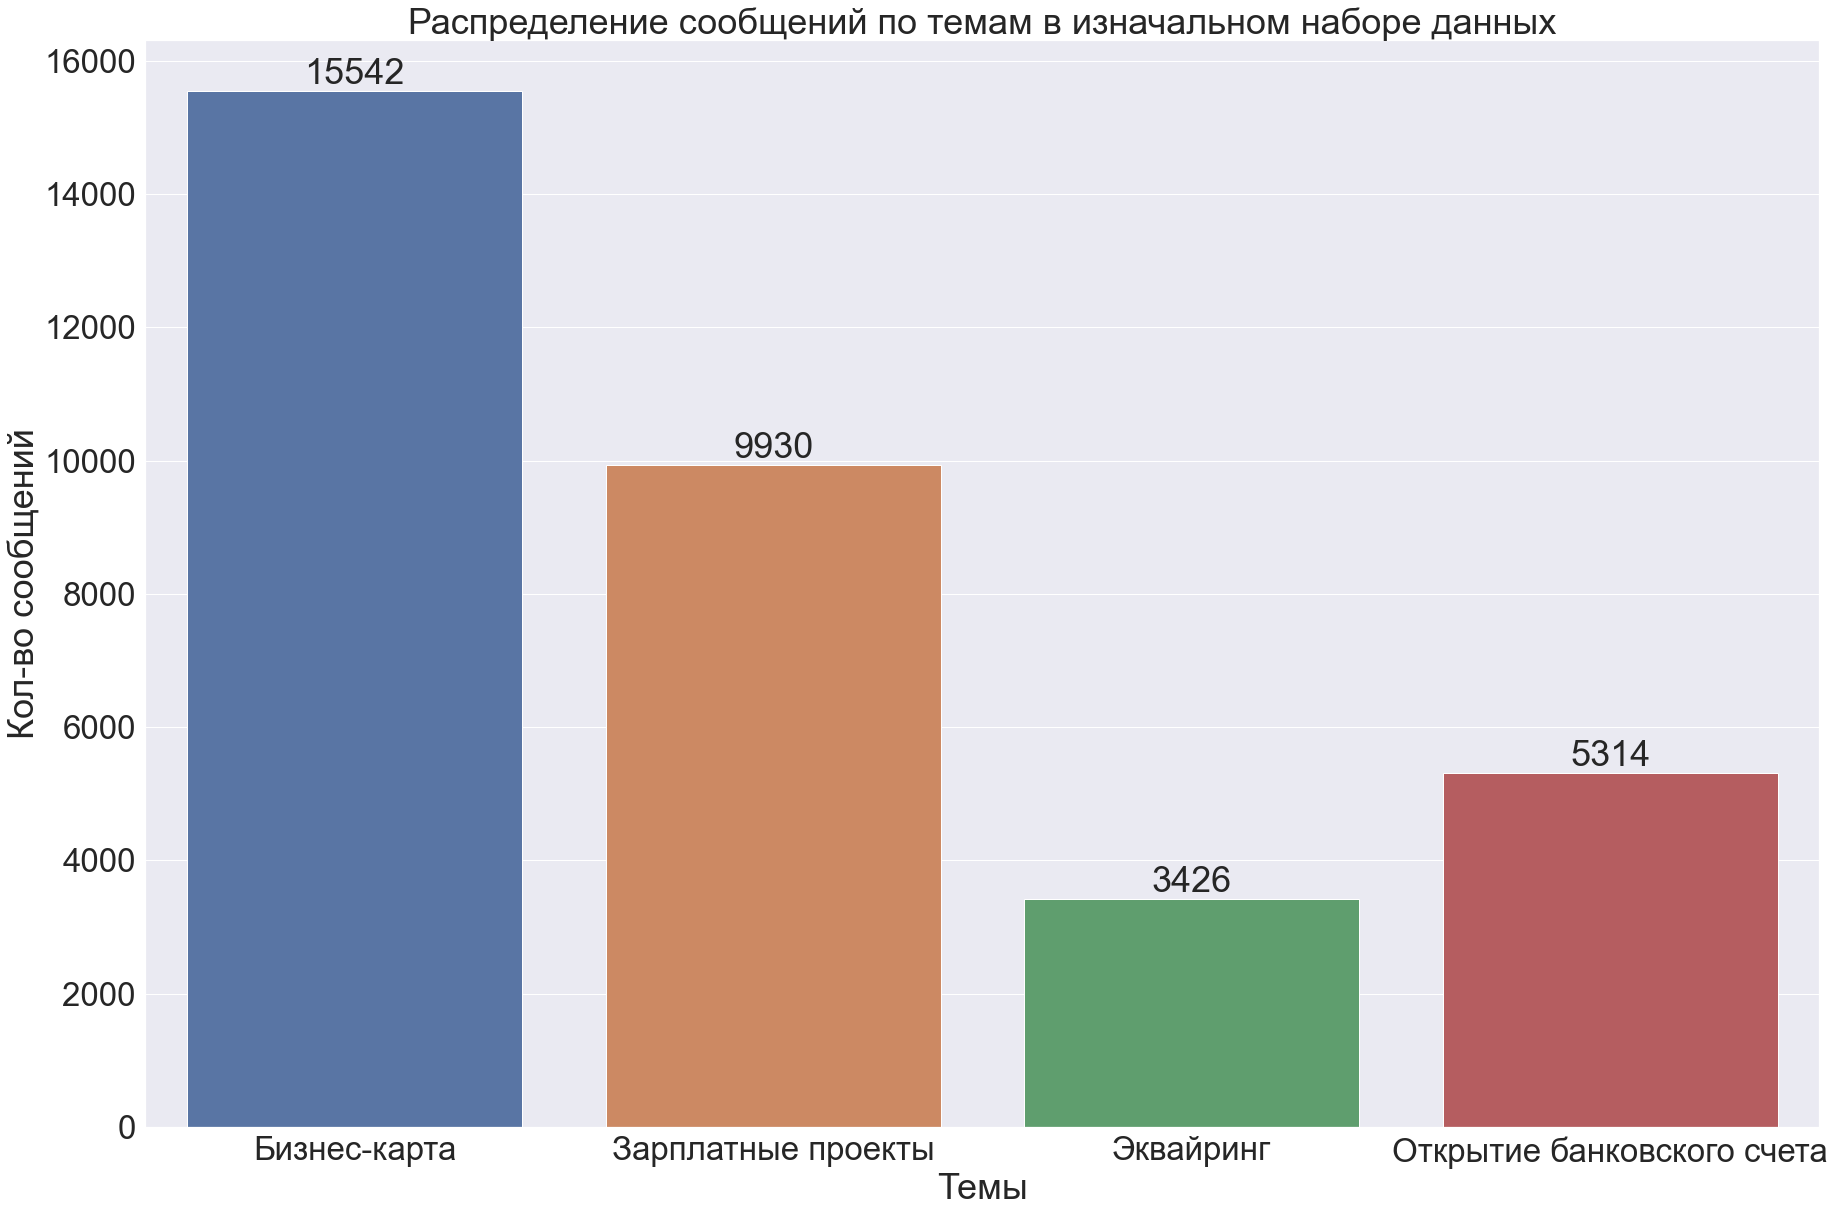

In [410]:
#Distribution of target varable in the OVESAMPLING train_set

sns.set(font_scale=3)

plt.subplots(figsize=(30,20))
ax=sns.countplot(x='y_train',data=train_set)
ax.set_title('Распределение сообщений по темам в изначальном наборе данных')
ax.set_xlabel('Темы')
ax.set_ylabel('Кол-во сообщений')
for label in ax.containers:
    ax.bar_label(label)

In [411]:
# Делаю новый тренировочный набор данных в котором все классы будкт равно представлены

In [412]:
# oversampling

In [414]:
bisnes_card_tr_OS=train_set[train_set['y_train']=='Бизнес-карта']

In [415]:
bisnes_card_tr_OS

,X_train,y_train
20790,персональный_менеджер бизнес индивидуальный_пр...,Бизнес-карта
916,продажа нужно сегодня минимум сделать здравств...,Бизнес-карта
31579,добрый_деть звать звать специалист блок бизнес...,Бизнес-карта
2796,добрый_деть менеджер индивидуальный_предприним...,Бизнес-карта
8458,добрый_деть бизнес клиентский_менеджер организ...,Бизнес-карта
...,...,...
34012,добрый_деть персональный_менеджер_сбербанк пов...,Бизнес-карта
32742,добрый_деть звать блок бизнес представитель ин...,Бизнес-карта
25227,добрый_деть приятно персональный_менеджер_сбер...,Бизнес-карта
36700,добрый_деть просить прощение звать лев блок би...,Бизнес-карта


In [430]:
zp_tr_OS=train_set[train_set['y_train']=='Зарплатные проекты']

In [431]:
a_zp=range(9930)

In [432]:
zp_tr_OS=zp_tr_OS.reset_index()
zp_tr_OS=zp_tr_OS[['X_train','y_train']]


In [433]:
zp_tr_OS

,X_train,y_train
0,здравствуйте персональный_менеджер_сбербанк би...,Зарплатные проекты
1,добрый_деть блок бизнес удобно начало хотеть у...,Зарплатные проекты
2,добрый_деть клиент бизнес индивидуальный_предп...,Зарплатные проекты
3,добрый_деть мать блок бизнес индивидуальный_пр...,Зарплатные проекты
4,добрый_деть клиентский_менеджер вводить блок б...,Зарплатные проекты
...,...,...
9925,здравствуйте специалист благодарить бизнес удо...,Зарплатные проекты
9926,добрый_деть звать менеджер_сбербанк блок бизне...,Зарплатные проекты
9927,добрый_деть звать персональный_менеджер бизнес...,Зарплатные проекты
9928,здравствуйте сбербанк_обслуживание юридический...,Зарплатные проекты


In [434]:
#Generating indexes for oversampling
np.random.seed(0)
zp_OS_indexes=np.random.choice(a_zp,size=15542)

In [436]:
#Creating 15542 zp observations
train_zp_OS_new=zp_tr_OS.loc[zp_OS_indexes]
train_zp_OS_new

,X_train,y_train
2732,добрый_деть менеджер индивидуальный_предприним...,Зарплатные проекты
9845,добрый_деть звать блок бизнес индивидуальный_п...,Зарплатные проекты
3264,приятно сбербанк_бизнес клиентский_менеджер ра...,Зарплатные проекты
4859,добрый_деть сбербанк_клиентский_менеджер предп...,Зарплатные проекты
9225,звать персональный_менеджер_сбербанк благо биз...,Зарплатные проекты
...,...,...
7614,добрый_деть персональный_менеджер_сбербанк бло...,Зарплатные проекты
9051,добрый_деть бизнес бухгалтер обращаться любовь...,Зарплатные проекты
3003,добрый_деть персональный_менеджер день бог орг...,Зарплатные проекты
7177,добрый_деть блок бизнес клиентский_менеджер ин...,Зарплатные проекты


In [437]:
ekv_tr_OS=train_set[train_set['y_train']=='Эквайринг']

In [438]:
ekv_tr_OS=ekv_tr_OS.reset_index()
ekv_tr_OS=ekv_tr_OS[['X_train','y_train']]


In [439]:
ekv_tr_OS

,X_train,y_train
0,добрый_деть добрый_деть звать сбербанк_бизнес ...,Эквайринг
1,здравствуйте добрый_деть звать сбербанк_обслуж...,Эквайринг
2,добрый_деть звать бизнес сказать обращаться пр...,Эквайринг
3,добрый_деть звать сбербанк_обслуживание юридич...,Эквайринг
4,добрый_деть звать удобно разговаривать получит...,Эквайринг
...,...,...
3421,добрый_деть ещё персональный_менеджер сбербанк...,Эквайринг
3422,добрый_деть звать сбербанк_бизнес обслуживание...,Эквайринг
3423,добрый_деть звать менеджер_сбербанк блок бизне...,Эквайринг
3424,добрый_деть здравствуйте звать блок бизнес обс...,Эквайринг


In [440]:
a_ekv=range(3426)

In [441]:
#Generating indexes for oversampling
np.random.seed(0)
ekv_OS_indexes=np.random.choice(a_ekv,size=15542)

In [442]:
#Creating 15542 zp observations
train_ekv_OS_new=ekv_tr_OS.loc[ekv_OS_indexes]
train_ekv_OS_new

,X_train,y_train
2732,бизнес звать здравствуйте эквайринг аренда вер...,Эквайринг
2607,здравствуйте звать блок бизнес организация ход...,Эквайринг
1653,добрый_деть звать сбербанк_клиентский_менеджер...,Эквайринг
3264,бизнес здравствуйте обращаться необходимо новы...,Эквайринг
835,добрый_деть клиентский_менеджер верно уважаемы...,Эквайринг
...,...,...
2410,добрый_деть клиент сбербанк_клиентский_менедже...,Эквайринг
784,добрый_деть клиентский_менеджер бизнес нибыть ...,Эквайринг
3369,добрый_деть звать рада помочь звать назвать по...,Эквайринг
973,добрый_деть блок бизнес клиентский_менеджер ве...,Эквайринг


In [457]:
obs_tr_OS=train_set[train_set['y_train']=='Открытие банковского счета']

In [458]:
obs_tr_OS=obs_tr_OS.reset_index()
obs_tr_OS=obs_tr_OS[['X_train','y_train']]

In [459]:
obs_tr_OS

,X_train,y_train
0,добрый_деть виктория сбербанк_клиентский_менед...,Открытие банковского счета
1,здравствуйте специалист благодарить бизнес удо...,Открытие банковского счета
2,добрый_деть длинный менеджер_сбербанк бизнес с...,Открытие банковского счета
3,добрый_деть персональный_менеджер бизнес индив...,Открытие банковского счета
4,добрый_деть персональный_менеджер стандарт огр...,Открытие банковского счета
...,...,...
5309,добрый_деть звать персональный_менеджер_сберба...,Открытие банковского счета
5310,здравствуйте выслушать здравствуйте персональн...,Открытие банковского счета
5311,добрый_деть звать максим возврат помочь звать ...,Открытие банковского счета
5312,добрый_деть бизнес клиентский_менеджер организ...,Открытие банковского счета


In [460]:
a_obs=range(5314)

In [461]:
#Generating indexes for oversampling
np.random.seed(0)
obs_OS_indexes=np.random.choice(a_obs,size=15542)

In [462]:
obs_tr_OS=obs_tr_OS.reset_index()
obs_tr_OS=obs_tr_OS[['X_train','y_train']]

In [463]:
obs_tr_OS

,X_train,y_train
0,добрый_деть виктория сбербанк_клиентский_менед...,Открытие банковского счета
1,здравствуйте специалист благодарить бизнес удо...,Открытие банковского счета
2,добрый_деть длинный менеджер_сбербанк бизнес с...,Открытие банковского счета
3,добрый_деть персональный_менеджер бизнес индив...,Открытие банковского счета
4,добрый_деть персональный_менеджер стандарт огр...,Открытие банковского счета
...,...,...
5309,добрый_деть звать персональный_менеджер_сберба...,Открытие банковского счета
5310,здравствуйте выслушать здравствуйте персональн...,Открытие банковского счета
5311,добрый_деть звать максим возврат помочь звать ...,Открытие банковского счета
5312,добрый_деть бизнес клиентский_менеджер организ...,Открытие банковского счета


In [464]:
#Creating 15542 zp observations
obs_tr_OS_new=obs_tr_OS.loc[obs_OS_indexes]
obs_tr_OS_new

,X_train,y_train
2732,добрый_деть клиентский_менеджер_сбербанк блок ...,Открытие банковского счета
2607,здравствуйте персональный_менеджер бизнес удоб...,Открытие банковского счета
1653,сбербанк_бизнес здравствуйте обратиться наимен...,Открытие банковского счета
3264,добрый_деть сбербанк_клиентский_менеджер получ...,Открытие банковского счета
4931,добрый_деть звать блок бизнес индивидуальный_п...,Открытие банковского счета
...,...,...
425,добрый_деть сбербанк_клиентский_менеджер блок ...,Открытие банковского счета
4569,добрый_деть персональный_менеджер_сбербанк удо...,Открытие банковского счета
1484,добрый_деть персональный_менеджер_сбербанк биз...,Открытие банковского счета
5202,сделать минута,Открытие банковского счета


In [465]:
train_set_OS_NEW=pd.concat([obs_tr_OS_new, train_zp_OS_new, train_ekv_OS_new,bisnes_card_tr_OS], ignore_index=True)
train_set_OS_NEW.describe()

,X_train,y_train
count,62168,62168
unique,31167,4
top,добрый_деть,Открытие банковского счета
freq,508,15542


In [467]:
X_train_OS=train_set_OS_NEW['X_train']

In [469]:
y_train_OS=train_set_OS_NEW['y_train']

In [470]:
logreg_2 = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])

In [473]:
logreg_2.fit(X_train_OS, y_train_OS)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [474]:
#Train_set
print('accuracy %s' % accuracy_score(logreg_2.predict(X_train_OS), y_train_OS))
print(classification_report(logreg_2.predict(X_train_OS), y_train_OS))

accuracy 0.8337569167417321
                            precision    recall  f1-score   support

              Бизнес-карта       0.80      0.84      0.82     14722
        Зарплатные проекты       0.82      0.83      0.83     15300
Открытие банковского счета       0.86      0.77      0.81     17384
                 Эквайринг       0.86      0.90      0.88     14762

                  accuracy                           0.83     62168
                 macro avg       0.83      0.84      0.83     62168
              weighted avg       0.83      0.83      0.83     62168



In [475]:
#Test_set
print('accuracy %s' % accuracy_score(logreg_2.predict(X_test), y_test))
print(classification_report(logreg_2.predict(X_test), y_test))

accuracy 0.7428972290424413
                            precision    recall  f1-score   support

              Бизнес-карта       0.77      0.89      0.82      3341
        Зарплатные проекты       0.72      0.77      0.74      2297
Открытие банковского счета       0.73      0.50      0.60      1931
                 Эквайринг       0.73      0.64      0.68       984

                  accuracy                           0.74      8553
                 macro avg       0.74      0.70      0.71      8553
              weighted avg       0.74      0.74      0.73      8553



In [477]:
# RF oversampling

In [478]:
RF2 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

In [479]:
RF2.fit(X_train_OS, y_train_OS)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [482]:
#Train_set
print('accuracy %s' % accuracy_score(RF2.predict(X_train_OS), y_train_OS))
print(classification_report(RF2.predict(X_train_OS), y_train_OS))

accuracy 0.9887884442156737
                            precision    recall  f1-score   support

              Бизнес-карта       0.99      0.98      0.98     15785
        Зарплатные проекты       0.99      0.99      0.99     15427
Открытие банковского счета       0.99      0.99      0.99     15504
                 Эквайринг       0.99      1.00      0.99     15452

                  accuracy                           0.99     62168
                 macro avg       0.99      0.99      0.99     62168
              weighted avg       0.99      0.99      0.99     62168



In [483]:
#Test_set
print('accuracy %s' % accuracy_score(RF2.predict(X_test), y_test))
print(classification_report(RF2.predict(X_test), y_test))

accuracy 0.7806617561089676
                            precision    recall  f1-score   support

              Бизнес-карта       0.90      0.77      0.83      4522
        Зарплатные проекты       0.70      0.83      0.76      2108
Открытие банковского счета       0.62      0.69      0.65      1202
                 Эквайринг       0.71      0.84      0.77       721

                  accuracy                           0.78      8553
                 macro avg       0.73      0.78      0.75      8553
              weighted avg       0.80      0.78      0.78      8553



In [484]:
#GB classifier

In [485]:
GB2_clf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', GradientBoostingClassifier()),
              ])

In [486]:
GB2_clf.fit(X_train_OS, y_train_OS)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())])

In [487]:
#Train_set
print('accuracy %s' % accuracy_score(GB2_clf.predict(X_train_OS), y_train_OS))
print(classification_report(GB2_clf.predict(X_train_OS), y_train_OS))

accuracy 0.7833773002187621
                            precision    recall  f1-score   support

              Бизнес-карта       0.73      0.89      0.80     12825
        Зарплатные проекты       0.72      0.88      0.79     12621
Открытие банковского счета       0.91      0.59      0.71     23991
                 Эквайринг       0.78      0.95      0.85     12731

                  accuracy                           0.78     62168
                 macro avg       0.78      0.83      0.79     62168
              weighted avg       0.81      0.78      0.78     62168



In [488]:
#Test_set
print('accuracy %s' % accuracy_score(GB2_clf.predict(X_test), y_test))
print(classification_report(GB2_clf.predict(X_test), y_test))

accuracy 0.7233719162866831
                            precision    recall  f1-score   support

              Бизнес-карта       0.72      0.94      0.81      2955
        Зарплатные проекты       0.67      0.86      0.75      1940
Открытие банковского счета       0.86      0.39      0.54      2916
                 Эквайринг       0.70      0.81      0.75       742

                  accuracy                           0.72      8553
                 macro avg       0.74      0.75      0.71      8553
              weighted avg       0.75      0.72      0.70      8553



# Вывод

In [492]:
# Oversampling не принес желаемых результатов